In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(ggpubr))

library(parallel)
library(data.table)
library(cowplot)
library(ggsci)
library(aplot)
library(plyr)
options(warn=-1)



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend


The following object is masked from ‘package:patchwork’:

    align_plots




ERROR: Error in library(aplot): there is no package called ‘aplot’


In [2]:
levels <- 'L3'
dir_path <- "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/"

file_list <- list.files(path = dir_path,
                        pattern = ".csv",
                        full.names = TRUE)
file_list

[1] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//Activated memory B cell_Y1D0.csv"             
 [2] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//Adaptive NK cell_Y1D0.csv"                    
 [3] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//ASDC_Y1D0.csv"                                
 [4] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//BaEoMaP cell_Y1D0.csv"                        
 [5] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//C1Q+ CD16 monocyte_Y1D0.csv"                  
 [6] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//CD14+ cDC2_Y1D0.csv"                          
 [7] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//CD27- effector B cell_Y1D0.csv"               
 [8] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//CD27+ effector B cell_Y1D0.csv"               
 [9] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//CD4 MAIT_Y1D0.csv"                            
[10] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//CD56bright NK cell_Y1D0.csv"                  
[11] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//CD8 MAIT_Y1D0.csv"                            
[12] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//CD8aa_Y1D0.csv"                               
[13] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//CD95 memory B cell_Y1D0.csv"                  
[14] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//cDC1_Y1D0.csv"                                
[15] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//CLP cell_Y1D0.csv"                            
[16] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//CM CD4 T cell_Y1D0.csv"                       
[17] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//CM CD8 T cell_Y1D0.csv"                       
[18] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//CMP cell_Y1D0.csv"                            
[19] "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female//Core CD14 monocyte_Y1D0.csv"                  
[20] "/home/jupyter/IH-A-Aging

In [50]:
# levels='L3'
# file_list<-list.files(path = paste0("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/DEG_cohort_splitby_sex_CSVfiles/Age_yr1_Day0_Female/",levels), pattern = ".csv", all.files = FALSE,
#            full.names = TRUE, recursive = FALSE,
#            ignore.case = FALSE, include.dirs = TRUE, no.. = FALSE)

# file_list

character(0)

In [7]:
# DEG_list<-mclapply(file_list,read.csv,mc.cores=length(file_list))
# DEG<-do.call(rbind,DEG_list)

In [3]:
#Read master DESEQ2 results
DEG <- read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/Figure_Notebooks/Intermediate_files/master_combined_DEG_list_all_celltypes_forfigs.csv")

In [4]:
head(DEG)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1.4553376,-1.58887408,0.3911621,-4.0619325,4.866815e-05,0.3688559,cohort.cohortGuid,BR1,CCDC174,ASDC,Female
2,2,0.3984625,0.41653866,0.5699233,0.7308679,4.648598e-01,0.9968973,cohort.cohortGuid,BR2,AL669831.5,ASDC,Female
3,3,1.6559504,0.25216783,0.3641720,0.6924415,4.886601e-01,0.9968973,cohort.cohortGuid,BR2,NOC2L,ASDC,Female
4,4,1.2866563,-0.97078515,0.5119361,-1.8963013,5.792021e-02,0.9968973,cohort.cohortGuid,BR1,ISG15,ASDC,Female
5,5,2.7154615,-0.05010603,0.2936791,-0.1706149,8.645266e-01,0.9968973,cohort.cohortGuid,BR1,SDF4,ASDC,Female
6,6,1.1378577,-0.29946048,0.4050389,-0.7393377,4.597020e-01,0.9968973,cohort.cohortGuid,BR1,B3GALT6,ASDC,Female


In [5]:
DEG<- DEG%>% mutate(Expression = case_when(log2FoldChange >= 0.1 & padj <=  0.1 ~ "Up-regulated",
                                                     log2FoldChange <= -0.1 & padj <= 0.1 ~ "Down-regulated",
                                                     TRUE ~ "Unchanged"))

In [6]:
selected_celltype<-unique(DEG$celltype)

In [7]:
DEG_sub<-DEG %>% filter(!Expression=="Unchanged")

In [8]:
table(DEG_sub$celltype)
length(unique(DEG_sub$celltype))


                  C1Q+ CD16 monocyte                CD27- effector B cell 
                                   1                                    4 
               CD27+ effector B cell                   CD56bright NK cell 
                                   6                                    1 
                            CD8 MAIT                                CD8aa 
                                   8                                   29 
                       CM CD4 T cell                        CM CD8 T cell 
                                  58                                  198 
                  Core CD14 monocyte                   Core CD16 monocyte 
                                  74                                    7 
                  Core memory B cell                Core naive CD4 T cell 
                                  29                                  547 
               Core naive CD8 T cell                            DN T cell 
                        

[1] 35

In [17]:
head(DEG_sub)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex,Expression
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,25584,26.2039,0.5401978,0.12130408,4.453253,8.457891e-06,0.0580380450,cohort.cohortGuid,BR2,SIDT2,C1Q+ CD16 monocyte,Female,Up-regulated
2,38002,195.6039,0.3388939,0.06186313,5.478124,4.298586e-08,0.0001944680,cohort.cohortGuid,BR2,BAX,CD8 MAIT,Female,Up-regulated
3,38003,272.8558,0.2571268,0.04977109,5.166187,2.389174e-07,0.0005404311,cohort.cohortGuid,BR2,RPS27L,CD8 MAIT,Female,Up-regulated
4,38004,153.5464,0.1968689,0.04517001,4.358398,1.310179e-05,0.0197574943,cohort.cohortGuid,BR2,SERPINB1,CD8 MAIT,Female,Up-regulated
5,38005,118.9794,0.2680649,0.06487421,4.132071,3.595088e-05,0.0406604482,cohort.cohortGuid,BR2,UPP1,CD8 MAIT,Female,Up-regulated
6,42526,214.4580,0.3669234,0.07207320,5.090982,3.562135e-07,0.0001025895,cohort.cohortGuid,BR2,RPL3,CD8aa,Female,Up-regulated


In [18]:
head(mean_df)

"Error in file(file, ""rt"") : cannot open the connection"
"Error in file(file, ""rt"") : cannot open the connection"
"Error in file(file, ""rt"") : cannot open the connection"
"Error in file(file, ""rt"") : cannot open the connection"
"Error in file(file, ""rt"") : cannot open the connection"
"Error in file(file, ""rt"") : cannot open the connection"


In [16]:
DEG_ms <- DEG_sub %>% filter(celltype == "IL1B+ CD14 monocyte", padj <=0.4)
DEG_ms

X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Direction,gene,celltype,sex,Expression
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
192903,19.097923,1.0170815,0.21954878,4.632599,3.611035e-06,0.005727102,cohort.cohortGuid,BR2,PTGS2,IL1B+ CD14 monocyte,Female,Up-regulated
192904,35.218851,0.8060933,0.17017765,4.736775,2.171455e-06,0.005727102,cohort.cohortGuid,BR2,BCL2A1,IL1B+ CD14 monocyte,Female,Up-regulated
192905,9.063871,0.7827152,0.17915695,4.368880,1.248855e-05,0.013204562,cohort.cohortGuid,BR2,NLRP3,IL1B+ CD14 monocyte,Female,Up-regulated
192906,208.585370,0.1870544,0.04424699,4.227506,2.362958e-05,0.018738259,cohort.cohortGuid,BR2,OAZ1,IL1B+ CD14 monocyte,Female,Up-regulated
192907,16.934799,1.4166163,0.37558388,3.771771,1.620932e-04,0.073619592,cohort.cohortGuid,BR2,G0S2,IL1B+ CD14 monocyte,Female,Up-regulated
192908,22.875834,0.3950609,0.10513449,3.757672,1.715013e-04,0.073619592,cohort.cohortGuid,BR2,CMTM6,IL1B+ CD14 monocyte,Female,Up-regulated
192909,11.859483,0.9072969,0.24333428,3.728603,1.925442e-04,0.073619592,cohort.cohortGuid,BR2,RASGEF1B,IL1B+ CD14 monocyte,Female,Up-regulated
192910,5.643832,0.7191839,0.19329037,3.720744,1.986370e-04,0.073619592,cohort.cohortGuid,BR2,RIPK2,IL1B+ CD14 monocyte,Female,Up-regulated
192911,5.119876,0.6556607,0.17682212,3.708024,2.088828e-04,0.073619592,cohort.cohortGuid,BR2,RABL6,IL1B+ CD14 monocyte,Female,Up-regulated


# Composition Scores

## Y1D0

In [10]:
meta_data<-read.csv('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA_meta_data-2024-05-09.csv')
meta_data_Y1D0<-meta_data%>% filter(sample.visitName=='Flu Year 1 Day 0', subject.biologicalSex == 'Female')

head(meta_data_Y1D0)
dim(meta_data)
dim(meta_data_Y1D0)

,X,Unnamed..0,lastUpdated,sample.id,sample.bridgingControl,sample.sampleKitGuid,sample.visitName,sample.visitDetails,sample.drawDate,sample.daysSinceFirstVisit,⋯,subject.race,subject.subjectGuid,cohort.cohortGuid,sample.diseaseStatesRecordedAtVisit,pbmc_sample_id,subject.covidVaxDose1.daysSinceFirstVisit,subject.covidVaxDose2.daysSinceFirstVisit,Covid_exclusion,subjectGuid,CMV
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,0,1,2024-05-10T17:12:44.959Z,f499ff83-e513-4d24-a10f-151348269fff,False,KT00001,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,Caucasian,BR1001,BR1,NA,PB00001-01,NA,NA,no,BR1001,Negative
2,2,3,2024-05-10T17:12:44.959Z,2db6fb3f-e3f4-454b-891b-9b068541b51d,False,KT00003,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,Caucasian,BR1003,BR1,NA,PB00003-01,440,461,no,BR1003,Negative
3,4,5,2024-05-10T17:12:44.959Z,eb5b3a3d-002e-40a6-aa19-aa0e6a7fff8f,False,KT00006,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,Caucasian,BR1005,BR1,NA,PB00006-01,451,492,no,BR1005,Negative
4,10,11,2024-05-10T17:12:44.959Z,fb3c3406-2797-4c31-b085-37d8138099a3,False,KT00012,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-10-01T00:00:00Z,0,⋯,Caucasian,BR1008,BR1,NA,PB00012-01,469,494,no,BR1008,Positive
5,14,15,2024-05-10T17:12:44.959Z,19e5fa0e-52a8-4bef-a19a-075ad37fd5e3,False,KT00016,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-11-01T00:00:00Z,0,⋯,Caucasian,BR2002,BR2,NA,PB00016-01,520,536,no,BR2002,Positive
6,20,21,2024-05-10T17:12:44.959Z,dedcaa14-0aa3-403b-9e13-475e715f0d69,False,KT00022,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,2019-11-01T00:00:00Z,0,⋯,Caucasian,BR1010,BR1,NA,PB00022-01,491,519,no,BR1010,Positive


[1] 868  32

[1] 51 32

In [11]:
# selected_type_list<-as.data.frame(table(DEG_sub$celltype)) %>% filter(Freq>50)
# selected_type_list

#selected_type_list <- c("Core CD14 monocyte", "ISG+ CD14 monocyte", 'IL1B+ CD14 monocyte', 'Intermediate monocyte', 'Core CD16 monocyte', 'ISG+ CD16 monocyte', 'C1Q+ CD16 monocyte')
selected_type_list <- c( 'IL1B+ CD14 monocyte')

In [27]:
mean_df_summary_all<-data.frame()
for (selected_celltype in selected_type_list){
print(selected_celltype)
selected_gene=DEG_sub %>% filter(celltype ==selected_celltype) %>% select(gene) %>% pull()
    print(selected_gene)
df_list<-mclapply(meta_data_Y1D0$pbmc_sample_id,function(X){
df<-read.csv(paste0('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/CertPro_analysis/scripts/scRNA/BRI/Average_LogNormalized_Expression/',X,'.csv'),
             check.names = FALSE, row.names=1)
print(df)
selected_celltype<-intersect(colnames(df),selected_celltype)
df_subset<-df[selected_gene,selected_celltype,drop = FALSE]
df_subset$pbmc_sample_id<-X

df_subset$Gene<-rownames(df_subset)

df_subset<-pivot_longer(df_subset, 
                        cols = -c(pbmc_sample_id,Gene), 
                        names_to = "AIFI_L3",  
                        values_to = "Mean_Expression") 
return(df_subset)
},mc.cores=60)
mean_df<-do.call(rbind, df_list)
mean_df<-left_join(mean_df,meta_data)
mean_df<-as.data.frame(mean_df[!is.na(mean_df$X),])
mean_df$Mean_Expression<-as.numeric(mean_df$Mean_Expression)    
mean_df<-left_join(mean_df,DEG_sub,by= c("Gene" = "X","AIFI_L3" = "celltype"))
    
# min_n <- DEG_sub %>%
#   filter(celltype == selected_celltype) %>%
#   dplyr::count(Expression) %>%
#   summarise(min_count = min(n)) %>%
#   pull(min_count)

top_n <- 100
    
top_deg<-DEG_sub %>% filter(celltype ==selected_celltype) %>% 
    filter(Expression=="Up-regulated") %>% arrange(padj,desc(abs(log2FoldChange))) %>% slice_head(n=top_n)
    


mean_df_sub<-mean_df %>% filter(Gene %in% top_deg$X)
mean_df_sub<-mean_df_sub %>% group_by(Gene) %>% mutate(Z_score_Mean_Expression=scale(Mean_Expression))  %>% 
                                        mutate(composititon_score=Z_score_Mean_Expression)  %>% 
                                        ungroup()
mean_df_summary<-mean_df_sub%>% group_by(pbmc_sample_id) %>% 
  dplyr::summarise(total_scores = sum(composititon_score))
mean_df_summary<-left_join(mean_df_summary,meta_data)
mean_df_summary$Ages<-as.numeric(substr(mean_df_summary$sample.drawDate,1,4))-mean_df_summary$subject.birthYear
mean_df_summary$celltype<-selected_celltype

mean_df_summary_all<-plyr::rbind.fill(mean_df_summary_all,mean_df_summary)
}





[1] "IL1B+ CD14 monocyte"
 [1] "PTGS2"    "BCL2A1"   "NLRP3"    "OAZ1"     "G0S2"     "CMTM6"   
 [7] "RASGEF1B" "RIPK2"    "RABL6"    "SGK1"     "SELENOK" 


Warning message in mclapply(meta_data_Y1D0$pbmc_sample_id, function(X) {:
“all scheduled cores encountered errors in user code”


ERROR: Error in UseMethod("left_join"): no applicable method for 'left_join' applied to an object of class "c('matrix', 'array', 'character')"


In [24]:
df_list

[[1]]
[1] "Error in file(file, \"rt\") : cannot open the connection\n"
attr(,"class")
[1] "try-error"
attr(,"condition")
<simpleError in file(file, "rt"): cannot open the connection>

[[2]]
[1] "Error in file(file, \"rt\") : cannot open the connection\n"
attr(,"class")
[1] "try-error"
attr(,"condition")
<simpleError in file(file, "rt"): cannot open the connection>

[[3]]
[1] "Error in file(file, \"rt\") : cannot open the connection\n"
attr(,"class")
[1] "try-error"
attr(,"condition")
<simpleError in file(file, "rt"): cannot open the connection>

[[4]]
[1] "Error in file(file, \"rt\") : cannot open the connection\n"
attr(,"class")
[1] "try-error"
attr(,"condition")
<simpleError in file(file, "rt"): cannot open the connection>

[[5]]
[1] "Error in file(file, \"rt\") : cannot open the connection\n"
attr(,"class")
[1] "try-error"
attr(,"condition")
<simpleError in file(file, "rt"): cannot open the connection>

[[6]]
[1] "Error in file(file, \"rt\") : cannot open the connection\n"
attr(,"cl

In [71]:
top_deg
length(top_deg$X)

X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year,Expression
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
BCL2A1,34.515393,1.0146767,0.17378858,5.838570,5.265087e-09,0.0000108882,IL1B+ CD14 monocyte,BR2,Y1,Up-regulated
PTGS2,18.262251,1.0483899,0.21956508,4.774848,1.798429e-06,0.0018595757,IL1B+ CD14 monocyte,BR2,Y1,Up-regulated
NLRP3,8.916142,0.8007832,0.17894100,4.475124,7.636687e-06,0.0052642232,IL1B+ CD14 monocyte,BR2,Y1,Up-regulated
RASGEF1B,12.182219,1.0262857,0.23525936,4.362359,1.286677e-05,0.0066521193,IL1B+ CD14 monocyte,BR2,Y1,Up-regulated
IL1B,55.745095,1.1557310,0.26847344,4.304824,1.671182e-05,0.0069120094,IL1B+ CD14 monocyte,BR2,Y1,Up-regulated
BCL6,6.567446,0.7309576,0.17974910,4.066544,4.771548e-05,0.0140965154,IL1B+ CD14 monocyte,BR2,Y1,Up-regulated
CMTM6,23.185185,0.4381138,0.10751046,4.075081,4.599836e-05,0.0140965154,IL1B+ CD14 monocyte,BR2,Y1,Up-regulated
G0S2,18.375665,1.5439924,0.39691938,3.889940,1.002691e-04,0.0230396180,IL1B+ CD14 monocyte,BR2,Y1,Up-regulated
SGK1,29.003578,0.7155207,0.18286781,3.912776,9.124131e-05,0.0230396180,IL1B+ CD14 monocyte,BR2,Y1,Up-regulated


[1] 19

In [76]:
mean_df_summary_all<-data.frame()
for (selected_celltype in selected_type_list){
print(selected_celltype)
selected_gene=DEG_sub %>% filter(celltype ==selected_celltype) %>% select(X) %>% pull()
df_list<-mclapply(meta_data_Y1D0$pbmc_sample_id,function(X){
df<-read.csv(paste0('/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/Average_Expression_by_Celltype_and_Sample/',X,'_AIFI_L3.csv'),
             check.names = FALSE, row.names=1)
selected_celltype<-intersect(colnames(df),selected_celltype)
df_subset<-df[selected_gene,selected_celltype,drop = FALSE]
df_subset$pbmc_sample_id<-X
df_subset$Gene<-rownames(df_subset)

df_subset<-pivot_longer(df_subset, 
                        cols = -c(pbmc_sample_id,Gene), 
                        names_to = "AIFI_L3",  
                        values_to = "Mean_Expression") 
return(df_subset)
},mc.cores=60)
mean_df<-do.call(rbind, df_list)
mean_df<-left_join(mean_df,meta_data)
mean_df<-as.data.frame(mean_df[!is.na(mean_df$X),])
mean_df$Mean_Expression<-as.numeric(mean_df$Mean_Expression)    
mean_df<-left_join(mean_df,DEG_sub,by= c("Gene" = "X","AIFI_L3" = "celltype"))
    
# min_n <- DEG_sub %>%
#   filter(celltype == selected_celltype) %>%
#   dplyr::count(Expression) %>%
#   summarise(min_count = min(n)) %>%
#   pull(min_count)

top_n <- 100
    
# top_deg<-DEG_sub %>% filter(celltype ==selected_celltype) %>% 
#     filter(Expression=="Up-regulated") %>% arrange(padj,desc(abs(log2FoldChange))) %>% slice_head(n=top_n)

top_deg<- DEG_sub %>% filter(celltype ==selected_celltype) %>% filter(Expression=="Up-regulated") %>% arrange(padj,desc(abs(log2FoldChange)))
    
mean_df_sub<-mean_df %>% filter(Gene %in% top_deg$X)
mean_df_sub<-mean_df_sub %>% group_by(Gene) %>% mutate(Z_score_Mean_Expression=scale(Mean_Expression))  %>% 
                                        mutate(composititon_score=Z_score_Mean_Expression)  %>% 
                                        ungroup()
mean_df_summary<-mean_df_sub%>% group_by(pbmc_sample_id, Gene) %>% 
  dplyr::summarise(total_scores = sum(composititon_score))
print(mean_df_summary)
mean_df_summary<-left_join(mean_df_summary,meta_data)
mean_df_summary$Ages<-as.numeric(substr(mean_df_summary$sample.drawDate,1,4))-mean_df_summary$subject.birthYear
mean_df_summary$celltype<-selected_celltype

mean_df_summary_all<-plyr::rbind.fill(mean_df_summary_all,mean_df_summary)
}





[1] "IL1B+ CD14 monocyte"


Joining with `by = join_by(pbmc_sample_id)`
`summarise()` has grouped output by 'pbmc_sample_id'. You can override using
the `.groups` argument.


# A tibble: 969 × 3
# Groups:   pbmc_sample_id [51]
   pbmc_sample_id Gene   total_scores
   <chr>          <chr>         <dbl>
 1 PB00001-01     BCL2A1      -0.0751
 2 PB00001-01     BCL6        -0.329 
 3 PB00001-01     CMTM6       -0.400 
 4 PB00001-01     CYTIP       -0.785 
 5 PB00001-01     G0S2        -0.302 
 6 PB00001-01     ID2         -0.923 
 7 PB00001-01     IL1B        -0.906 
 8 PB00001-01     METRNL      -1.05  
 9 PB00001-01     MIDN        -0.411 
10 PB00001-01     NAMPT       -1.30  
# ℹ 959 more rows


Joining with `by = join_by(pbmc_sample_id)`


In [72]:
mean_df_summary_all

pbmc_sample_id,total_scores,X.1,X,lastUpdated,sample.id,sample.bridgingControl,sample.sampleKitGuid,sample.visitName,sample.visitDetails,⋯,Sample_ID,Sample_Draw_date,Covid_Dose_1,Covid_Dose_2,Covid_exlcusion,BMI,file.name.downloaded,file.path,Ages,celltype
<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
PB00001-01,-12.28520432,1,1,2023-11-18T02:03:08.347Z,f499ff83-e513-4d24-a10f-151348269fff,false,KT00001,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,⋯,NA,2019-10-15,NA,NA,no,<25-BMI,B001-P1_PB00001-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/fec489f9-9a74-4635-aa91-d2bf09d1faec/B001-P1_PB00001-01_labeled.h5,32,IL1B+ CD14 monocyte
PB00003-01,-18.75826365,3,3,2023-11-18T02:03:08.347Z,2db6fb3f-e3f4-454b-891b-9b068541b51d,false,KT00003,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,⋯,NA,2019-10-15,2020-12-28,2021-01-16,no,<25-BMI,B001-P1_PB00003-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/40efd03a-cb2f-4677-af42-a056cbfe5a17/B001-P1_PB00003-01_labeled.h5,30,IL1B+ CD14 monocyte
PB00006-01,-8.82849265,5,5,2023-11-19T05:07:36.805Z,eb5b3a3d-002e-40a6-aa19-aa0e6a7fff8f,false,KT00006,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,⋯,NA,2019-10-23,2021-01-16,2021-02-26,no,<25-BMI,B002-P1_PB00006-01_2023-11-17T21:36:51.794326181Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/ea8d98e9-e99e-4dc6-9e78-9866e0deac68/B002-P1_PB00006-01_2023-11-17T21:36:51.794326181Z_labeled.h5,27,IL1B+ CD14 monocyte
PB00012-01,-5.67138823,7,7,2023-11-19T10:06:55.06Z,fb3c3406-2797-4c31-b085-37d8138099a3,false,KT00012,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,⋯,NA,2019-10-29,NA,NA,no,>30BMI,B002-P1_PB00012-01_2023-11-17T21:36:51.794326181Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/7a99c4c8-5438-430a-a37a-5b5f4052c064/B002-P1_PB00012-01_2023-11-17T21:36:51.794326181Z_labeled.h5,34,IL1B+ CD14 monocyte
PB00016-01,3.55964801,10,10,2023-11-19T09:36:51.309Z,19e5fa0e-52a8-4bef-a19a-075ad37fd5e3,false,KT00016,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,⋯,NA,2019-11-04,2021-04-07,2021-04-23,no,<25-BMI,B002-P1_PB00016-01_2023-11-17T21:36:51.794326181Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/d22d313f-b908-416b-aa78-b534fcce758c/B002-P1_PB00016-01_2023-11-17T21:36:51.794326181Z_labeled.h5,57,IL1B+ CD14 monocyte
PB00022-01,-2.53836221,11,11,2023-11-19T12:10:10.248Z,dedcaa14-0aa3-403b-9e13-475e715f0d69,false,KT00022,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,⋯,NA,2019-11-13,2021-03-18,2021-04-15,no,<25-BMI,B002-P2_PB00022-01_2023-11-17T21:38:04.103392546Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/9114124c-af57-47a7-bde3-ade4a150ac82/B002-P2_PB00022-01_2023-11-17T21:38:04.103392546Z_labeled.h5,29,IL1B+ CD14 monocyte
PB00023-05,-13.48426029,12,12,2023-11-18T02:03:08.347Z,70146ae1-7568-4d58-9744-ae42cdf3af5a,false,KT00023,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,⋯,NA,2019-11-19,2021-04-04,2021-04-26,no,<25-BMI,B078-P2_PB00023-05_2021-08-19T17:09:29.934849811Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/9d5d8b77-6fb9-4f6c-8f0f-a24d87968962/B078-P2_PB00023-05_2021-08-19T17:09:29.934849811Z_labeled.h5,26,IL1B+ CD14 monocyte
PB00030-02,-7.19023517,15,15,2023-11-18T02:03:08.347Z,42756527-f764-4e83-ac50-762ce216966a,false,KT00030,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,⋯,NA,2019-12-23,2021-03-10,2021-04-02,no,<25-BMI,B078-P2_PB00030-02_2021-08-19T17:09:29.934849811Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/99c4ef81-a7b5-4828-ac71-fea1aa8b7580/B078-P2_PB00030-02_2021-08-19T17:09:29.934849811Z_labeled.h5,31,IL1B+ CD14 monocyte
PB00031-05,-4.94058000,16,16,2023-11-18T02:03:08.347Z,ac47e675-d550-418b-8bc5-8a5a132909a2,false,KT00031,Flu Year 1 Day 0,N/A - Flu-Series Timepoint Only,⋯,NA,2019-12-23,NA,NA,no,>25-30BMI,B078-P2_PB00031-05_2021-08-19T17:09:29.934849811Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/4865c903-937d-41f6-ae85-82531011af5a/B078-P2_PB00031-05_2021-08-19T17:09:29.934849811Z_labeled.h5,26,IL1

In [73]:
unique(mean_df_summary_all$subject.biologicalSex)

[1] "Female"

`geom_smooth()` using formula = 'y ~ x'


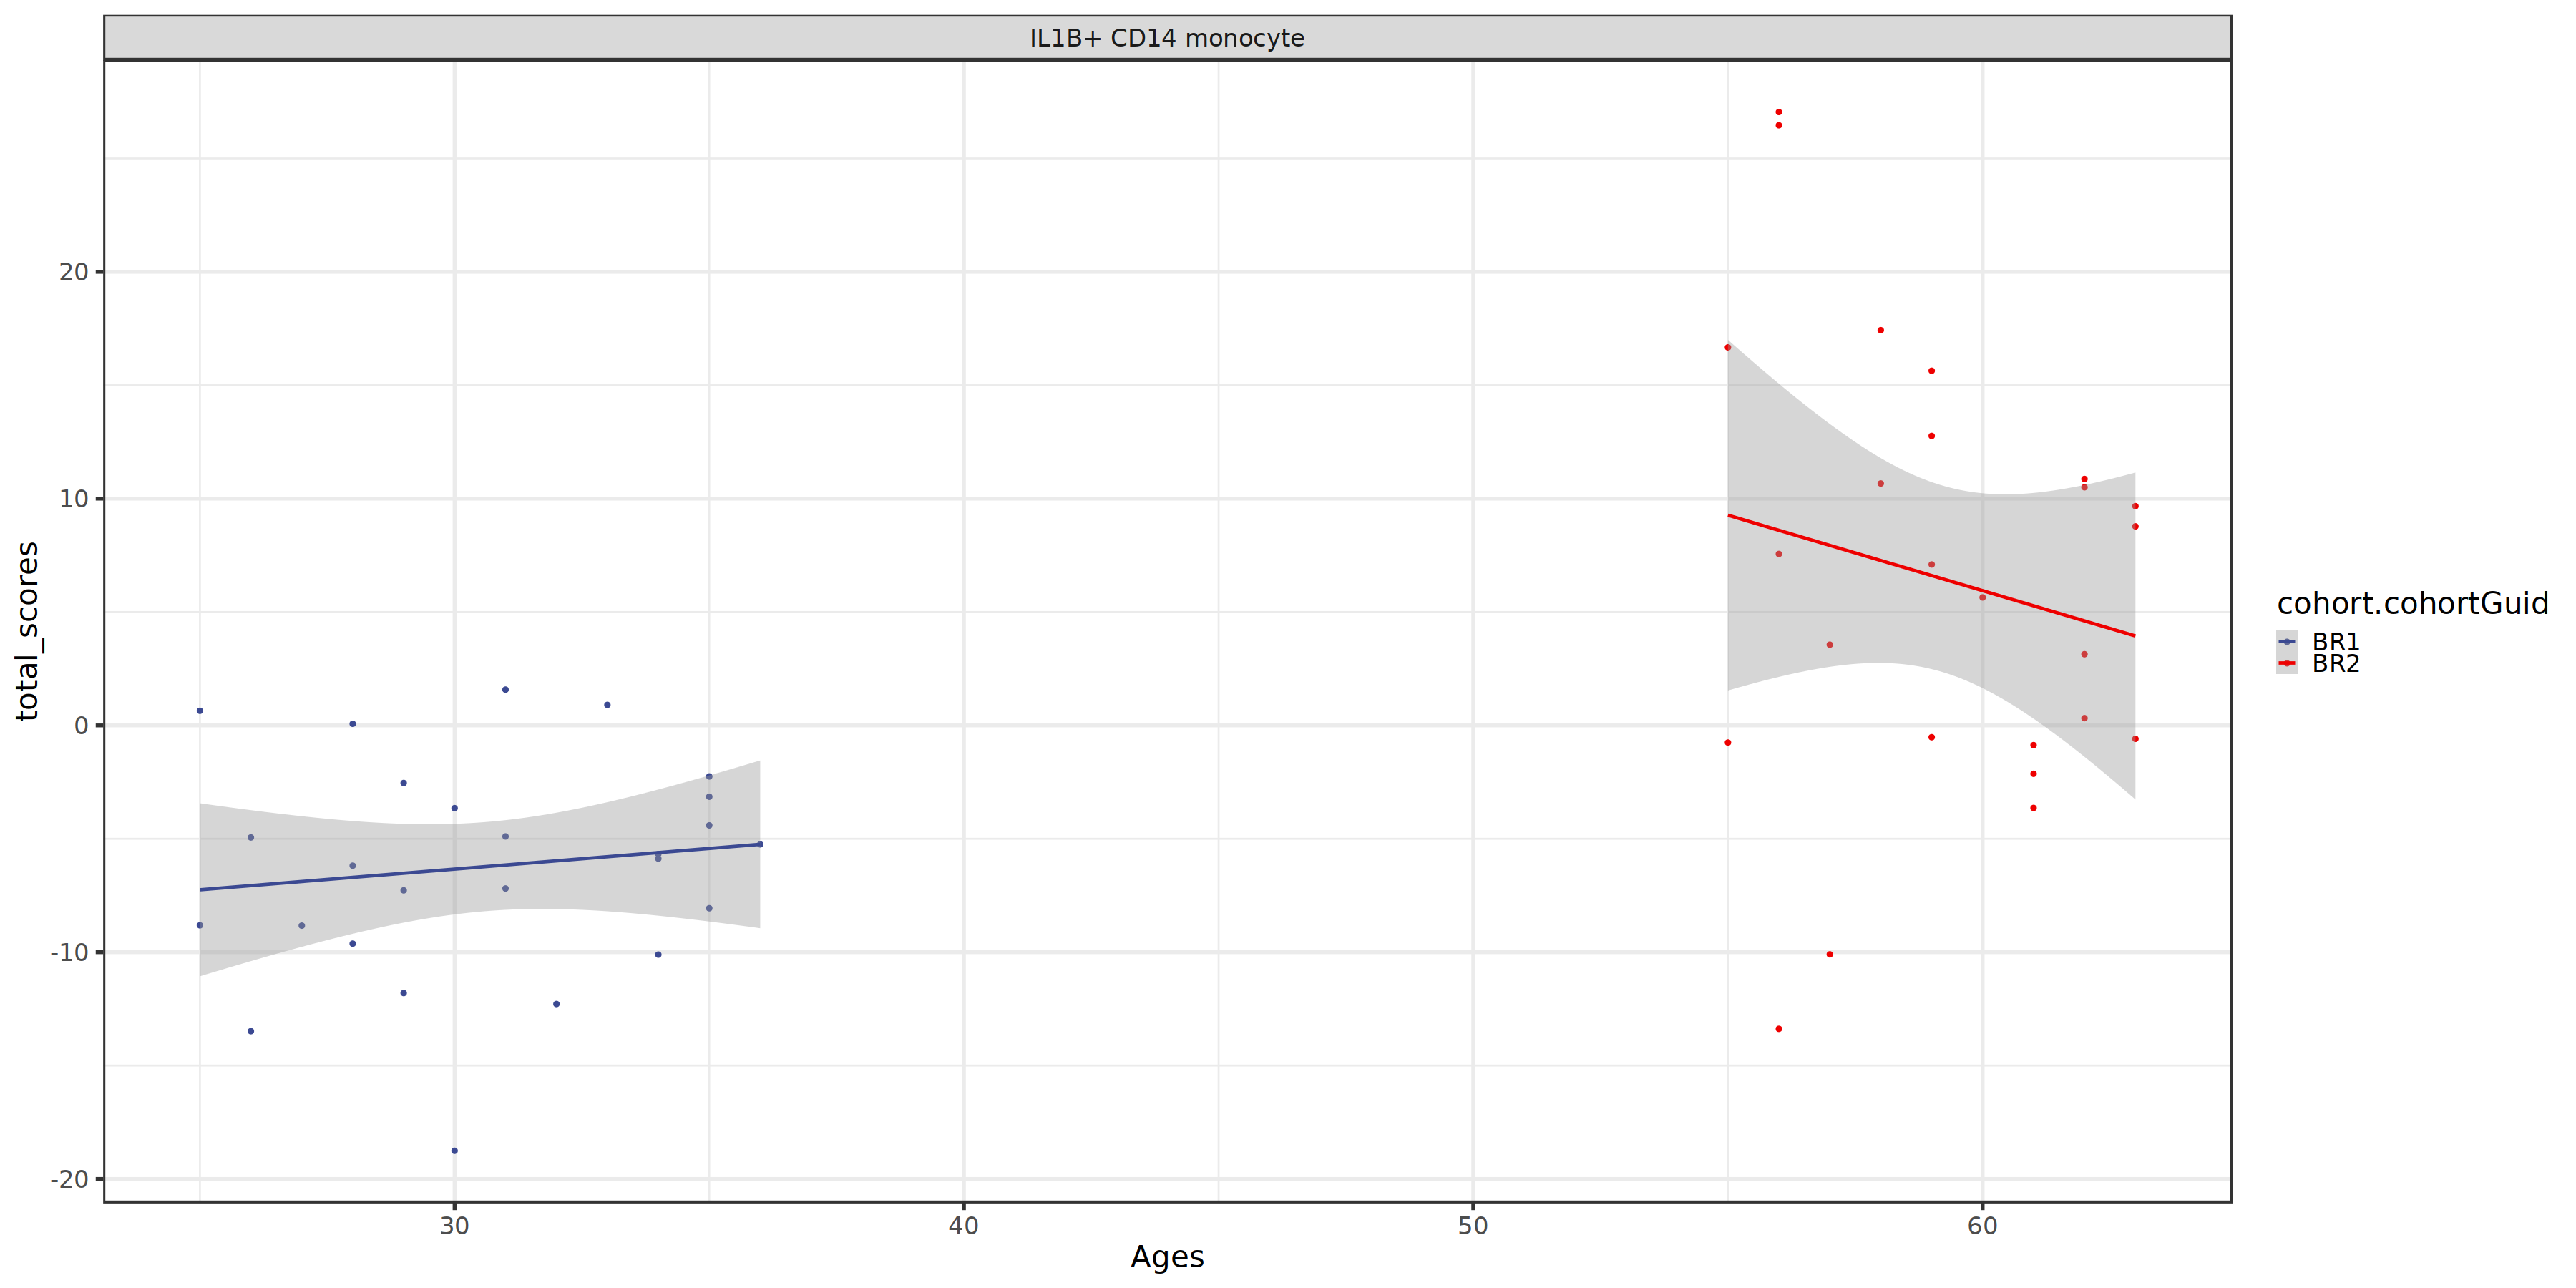

In [74]:
options(repr.plot.width = 30, repr.plot.height = 15)

ggplot(mean_df_summary_all,aes(Ages, total_scores,color =cohort.cohortGuid)) +
  geom_point()+
  geom_smooth(method='lm')+scale_color_aaas()+facet_wrap(~celltype,scale="free")+theme_bw(base_size=25)

`geom_smooth()` using formula = 'y ~ x'


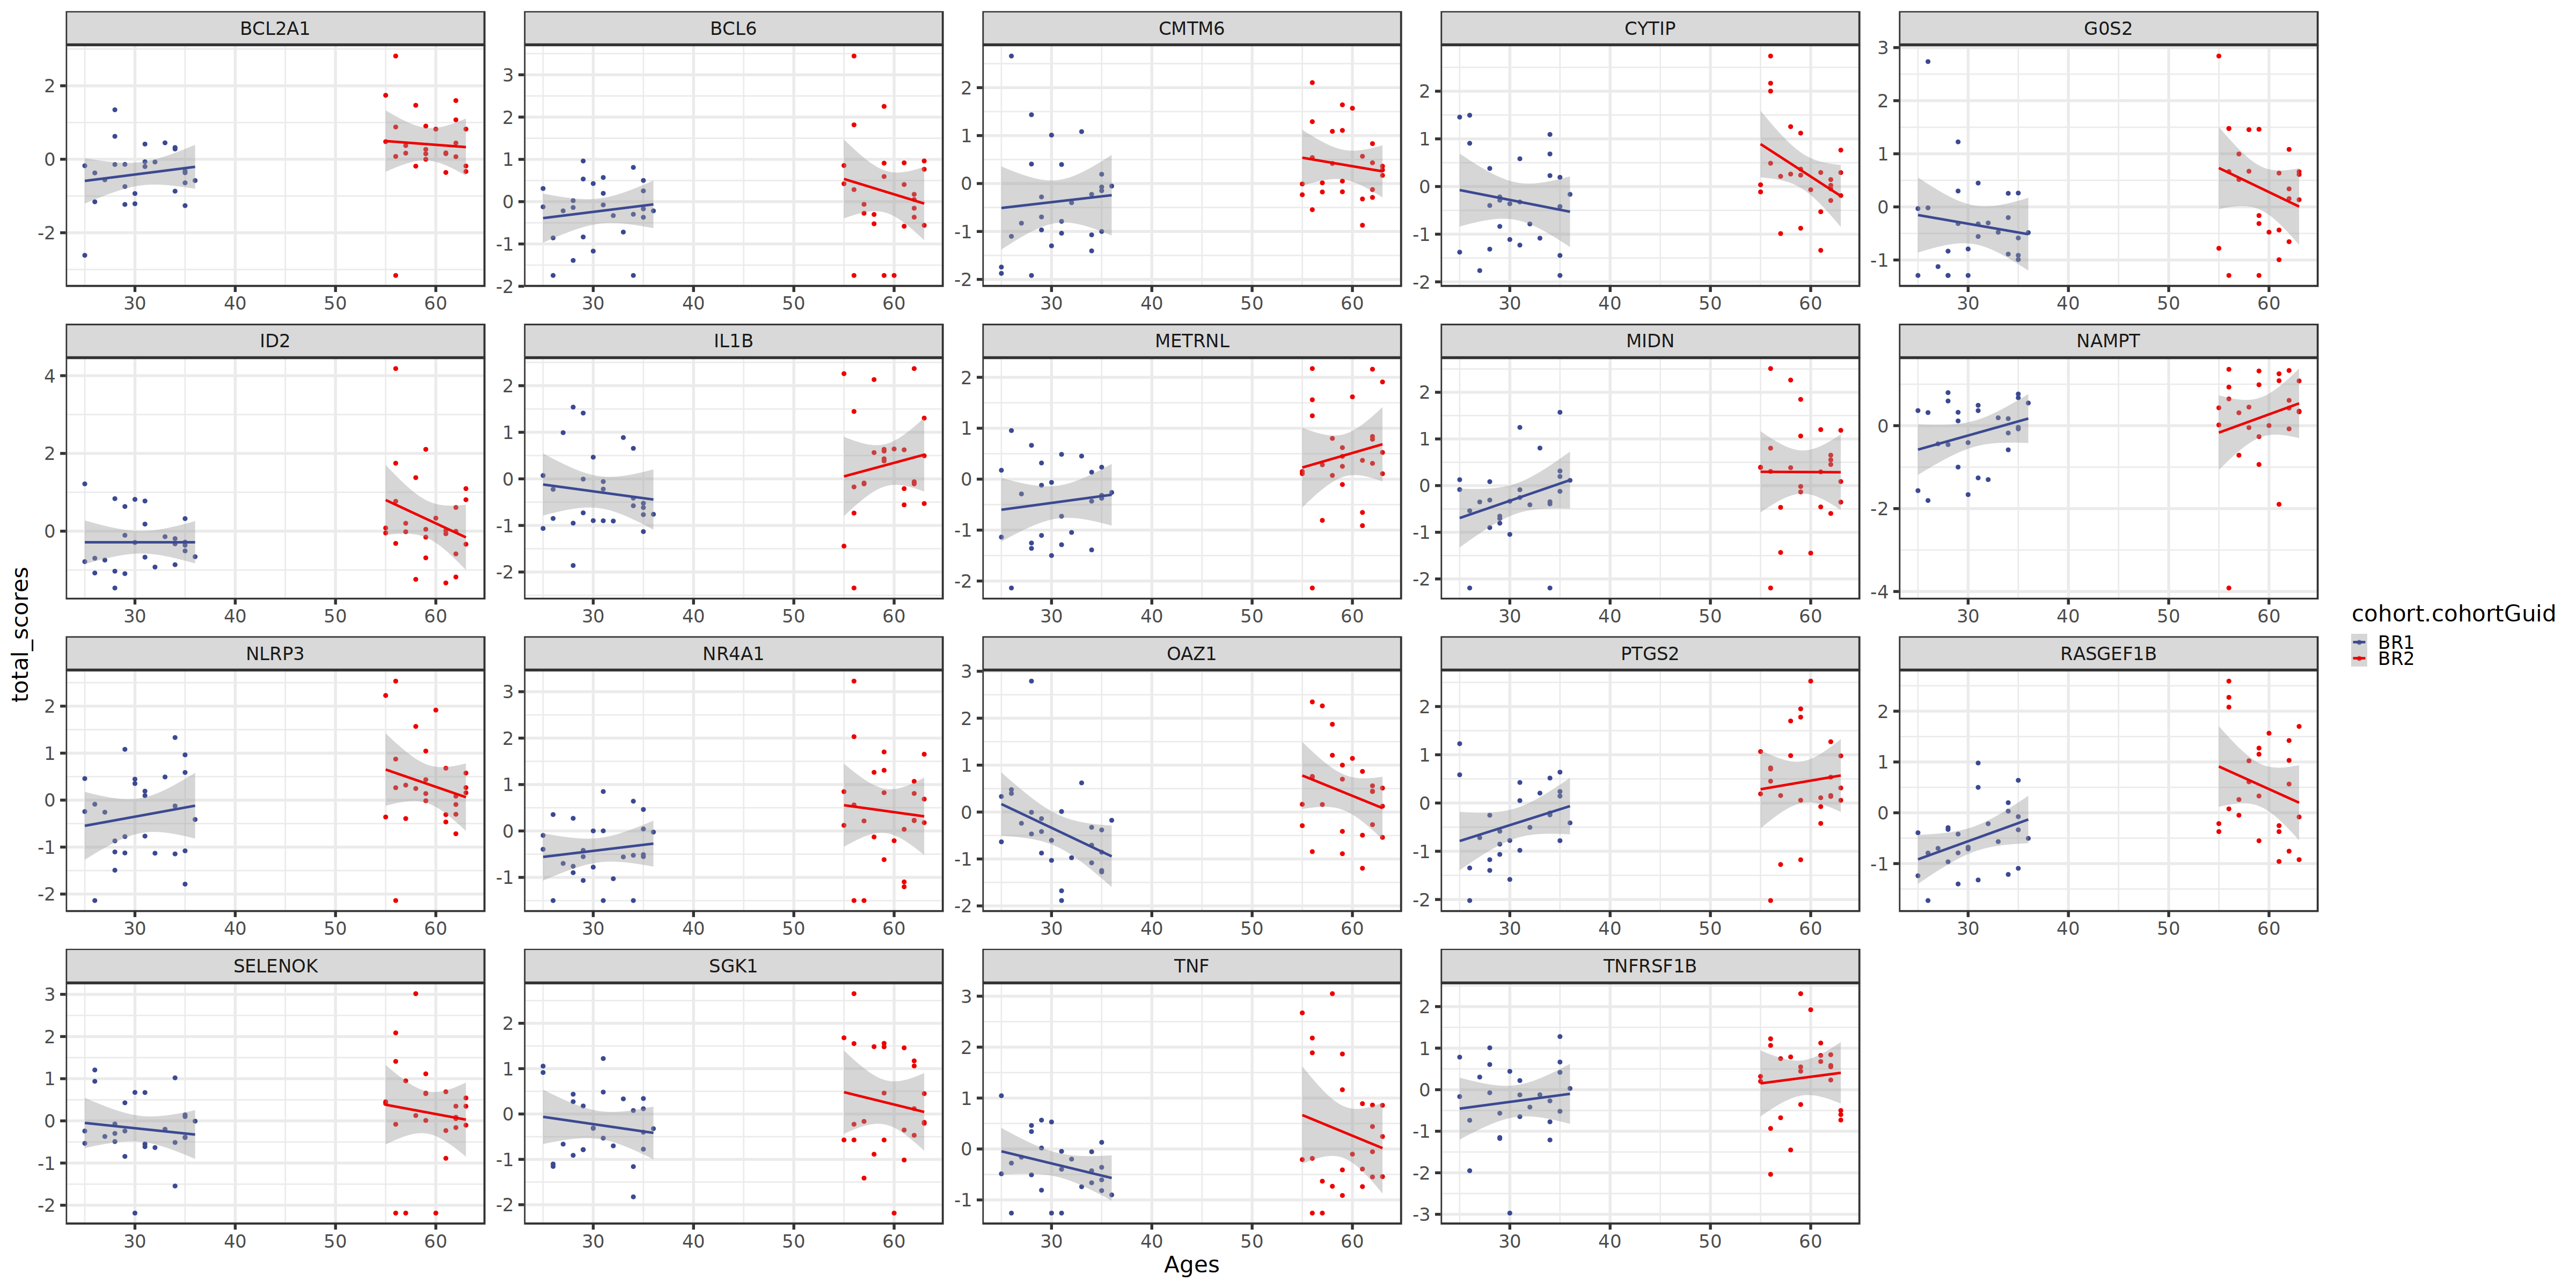

In [77]:
options(repr.plot.width = 40, repr.plot.height = 20)

ggplot(mean_df_summary_all,aes(Ages, total_scores,color =cohort.cohortGuid)) +
  geom_point()+
  geom_smooth(method='lm')+scale_color_aaas()+facet_wrap(~Gene,scale="free")+theme_bw(base_size=25)

In [78]:
mean_df_summary_all
write.csv(mean_df_summary_all, "/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/Mean_summary_Composition_z_score.csv")

pbmc_sample_id,Gene,total_scores,X.1,X,lastUpdated,sample.id,sample.bridgingControl,sample.sampleKitGuid,sample.visitName,⋯,Sample_ID,Sample_Draw_date,Covid_Dose_1,Covid_Dose_2,Covid_exlcusion,BMI,file.name.downloaded,file.path,Ages,celltype
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
PB00001-01,BCL2A1,-0.07506453,1,1,2023-11-18T02:03:08.347Z,f499ff83-e513-4d24-a10f-151348269fff,false,KT00001,Flu Year 1 Day 0,⋯,NA,2019-10-15,NA,NA,no,<25-BMI,B001-P1_PB00001-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/fec489f9-9a74-4635-aa91-d2bf09d1faec/B001-P1_PB00001-01_labeled.h5,32,IL1B+ CD14 monocyte
PB00001-01,BCL6,-0.32872012,1,1,2023-11-18T02:03:08.347Z,f499ff83-e513-4d24-a10f-151348269fff,false,KT00001,Flu Year 1 Day 0,⋯,NA,2019-10-15,NA,NA,no,<25-BMI,B001-P1_PB00001-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/fec489f9-9a74-4635-aa91-d2bf09d1faec/B001-P1_PB00001-01_labeled.h5,32,IL1B+ CD14 monocyte
PB00001-01,CMTM6,-0.40016331,1,1,2023-11-18T02:03:08.347Z,f499ff83-e513-4d24-a10f-151348269fff,false,KT00001,Flu Year 1 Day 0,⋯,NA,2019-10-15,NA,NA,no,<25-BMI,B001-P1_PB00001-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/fec489f9-9a74-4635-aa91-d2bf09d1faec/B001-P1_PB00001-01_labeled.h5,32,IL1B+ CD14 monocyte
PB00001-01,CYTIP,-0.78509021,1,1,2023-11-18T02:03:08.347Z,f499ff83-e513-4d24-a10f-151348269fff,false,KT00001,Flu Year 1 Day 0,⋯,NA,2019-10-15,NA,NA,no,<25-BMI,B001-P1_PB00001-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/fec489f9-9a74-4635-aa91-d2bf09d1faec/B001-P1_PB00001-01_labeled.h5,32,IL1B+ CD14 monocyte
PB00001-01,G0S2,-0.30228384,1,1,2023-11-18T02:03:08.347Z,f499ff83-e513-4d24-a10f-151348269fff,false,KT00001,Flu Year 1 Day 0,⋯,NA,2019-10-15,NA,NA,no,<25-BMI,B001-P1_PB00001-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/fec489f9-9a74-4635-aa91-d2bf09d1faec/B001-P1_PB00001-01_labeled.h5,32,IL1B+ CD14 monocyte
PB00001-01,ID2,-0.92339431,1,1,2023-11-18T02:03:08.347Z,f499ff83-e513-4d24-a10f-151348269fff,false,KT00001,Flu Year 1 Day 0,⋯,NA,2019-10-15,NA,NA,no,<25-BMI,B001-P1_PB00001-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/fec489f9-9a74-4635-aa91-d2bf09d1faec/B001-P1_PB00001-01_labeled.h5,32,IL1B+ CD14 monocyte
PB00001-01,IL1B,-0.90559030,1,1,2023-11-18T02:03:08.347Z,f499ff83-e513-4d24-a10f-151348269fff,false,KT00001,Flu Year 1 Day 0,⋯,NA,2019-10-15,NA,NA,no,<25-BMI,B001-P1_PB00001-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/fec489f9-9a74-4635-aa91-d2bf09d1faec/B001-P1_PB00001-01_labeled.h5,32,IL1B+ CD14 monocyte
PB00001-01,METRNL,-1.04618652,1,1,2023-11-18T02:03:08.347Z,f499ff83-e513-4d24-a10f-151348269fff,false,KT00001,Flu Year 1 Day 0,⋯,NA,2019-10-15,NA,NA,no,<25-BMI,B001-P1_PB00001-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/fec489f9-9a74-4635-aa91-d2bf09d1faec/B001-P1_PB00001-01_labeled.h5,32,IL1B+ CD14 monocyte
PB00001-01,MIDN,-0.41070168,1,1,2023-11-18T02:03:08.347Z,f499ff83-e513-4d24-a10f-151348269fff,false,KT00001,Flu Year 1 Day 0,⋯,NA,2019-10-15,NA,NA,no,<25-BMI,B001-P1_PB00001-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/fec489f9-9a74-4635-aa91-d2bf09d1faec/B001-P1_PB00001-01_labeled.h5,32,IL1B+ CD14 monocyte


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


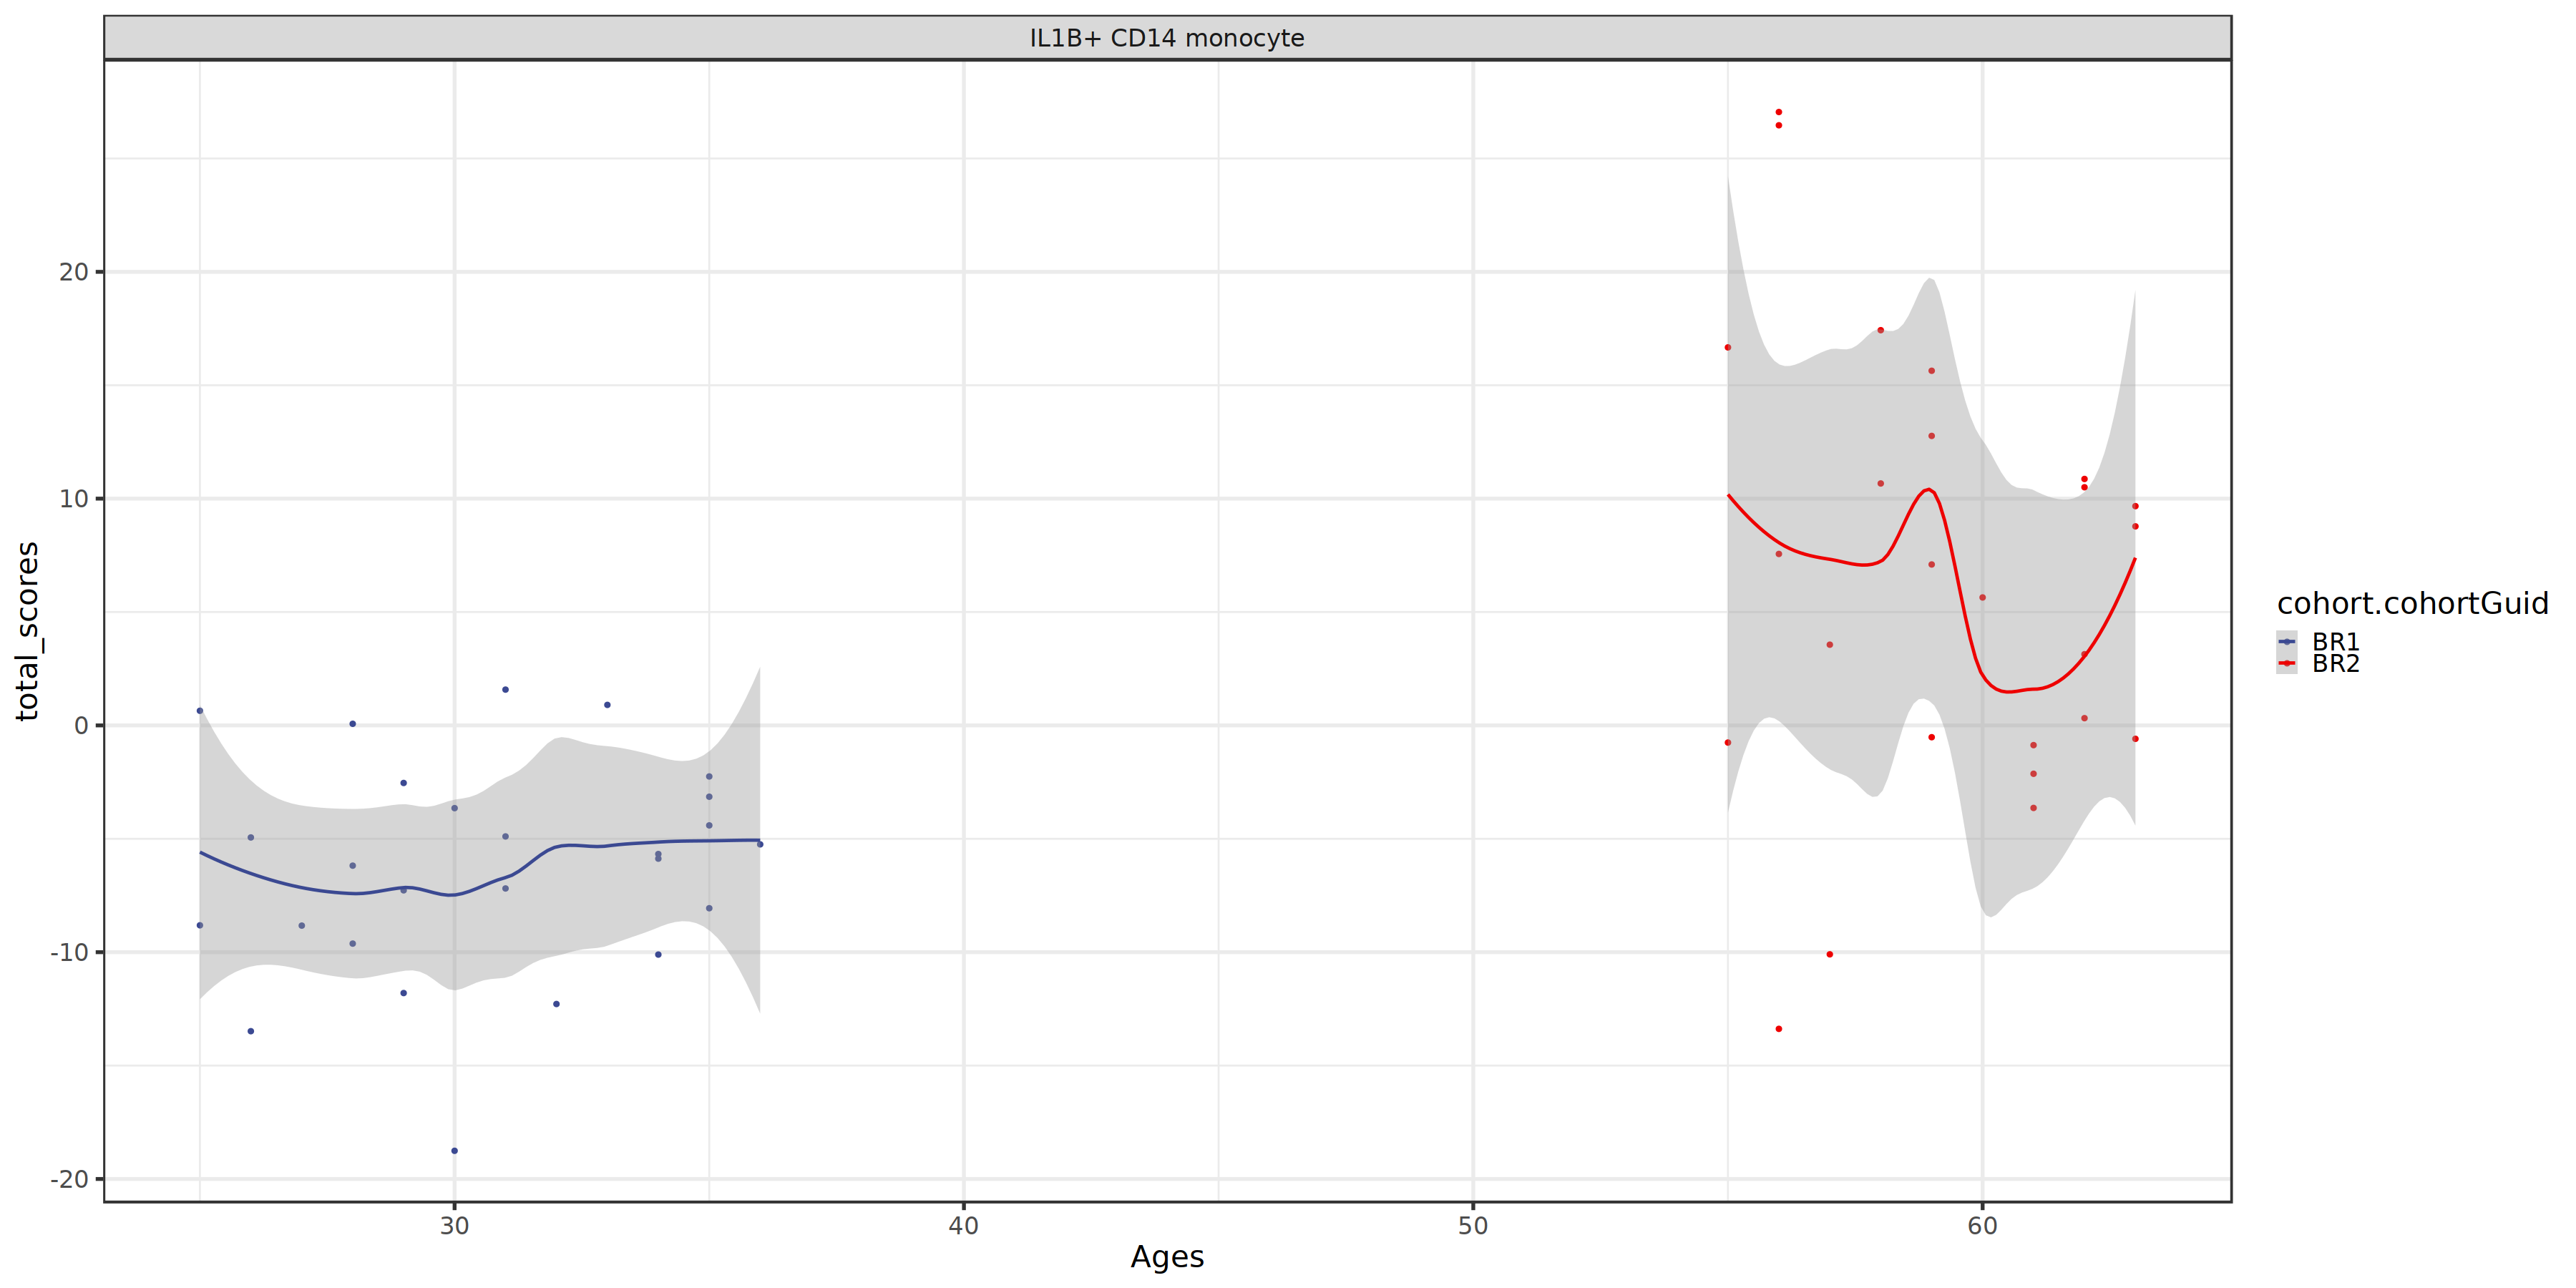

In [82]:
options(repr.plot.width = 30, repr.plot.height = 15)

ggplot(mean_df_summary_all,aes(Ages, total_scores,color =cohort.cohortGuid)) +
  geom_point()+
  geom_smooth()+scale_color_aaas()+facet_wrap(~celltype,scale="free")+theme_bw(base_size=25)